Programmer: Mahek Shaikh BE-B

Given a bank customer, build a neural network-based classifier that can determine whether
they will leave or not in the next 6 months. Dataset Description: The case study is from an
open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14
distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance,
etc. Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customerchurn-modeling Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and implement the
same.
5. Print the accuracy score and confusion matrix 

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df.shape

(10000, 14)

In [75]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [76]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [77]:
x=df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember','EstimatedSalary']]# output data
y=df[ 'Exited']


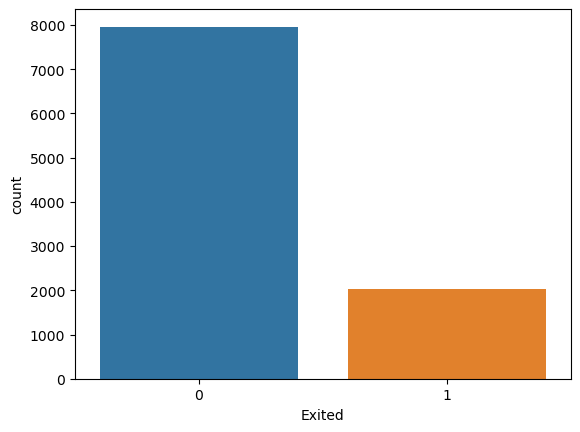

In [78]:
sns.countplot(x=y);

In [79]:
y.value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

In [80]:
from sklearn.preprocessing import StandardScaler

Scaler =StandardScaler()

x_scaled=Scaler.fit_transform(x)

x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.3)


x.shape

(10000, 8)

In [82]:
x_train.shape



(7000, 8)

In [83]:
x_test.shape

(3000, 8)

In [84]:
from sklearn.neural_network import MLPClassifier

ann= MLPClassifier(hidden_layer_sizes=(100,100,100),random_state = 0, max_iter=100)

ann.fit(x_train,y_train)


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [85]:
y_pred = ann.predict(x_test)

In [86]:

from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

y_test.value_counts()

0    2379
1     621
Name: Exited, dtype: int64

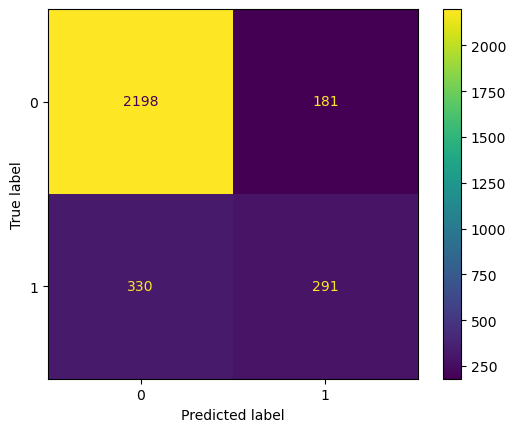

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [88]:

accuracy_score(y_test,y_pred)

0.8296666666666667

In [89]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2379
           1       0.62      0.47      0.53       621

    accuracy                           0.83      3000
   macro avg       0.74      0.70      0.71      3000
weighted avg       0.82      0.83      0.82      3000



In [90]:
!pip install imbalanced-learn

In [91]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler (random_state =0)
x_res,y_res = ros.fit_resample(x,y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [92]:
from sklearn.preprocessing import StandardScaler

Scaler =StandardScaler()
x_scaled=Scaler.fit_transform(x_res)
x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 ,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [107]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x_scaled,y_res,random_state=0,test_size=0.3)
x_res.shape


(15926, 8)

In [100]:

from sklearn.neural_network import MLPClassifier
ann= MLPClassifier(hidden_layer_sizes=(100,100,100),random_state = 0, max_iter=100)
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [101]:
y_pred = ann.predict(x_test)
y_test.value_counts()

1    2394
0    2384
Name: Exited, dtype: int64

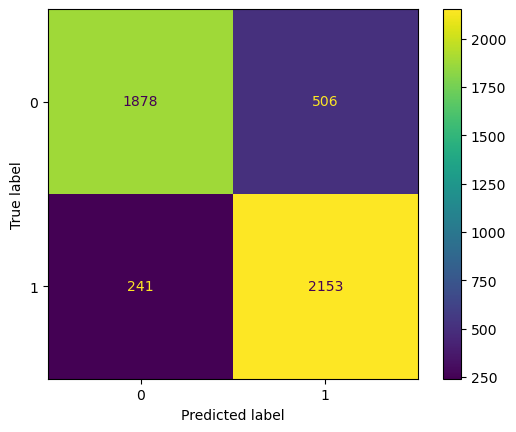

In [102]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [103]:
accuracy_score(y_test,y_pred)

0.843658434491419

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83      2384
           1       0.81      0.90      0.85      2394

    accuracy                           0.84      4778
   macro avg       0.85      0.84      0.84      4778
weighted avg       0.85      0.84      0.84      4778

